# Evaluación de un modelo

La **evaluación** de un modelo es uno de los pasos más importantes en el proceso de Machine Learning, ya que nos va a permitir saber cómo de bueno es nuestro modelo, cuánto ha aprendido de la muestra de entrenamiento (`train`) y cómo procederá para datos nunca vistos o nuevos (`test` y/o `validación`).

Para evaluar un modelo existen ciertos conjuntos de métricas, que se distinguen según si un modelo permite clasificar o realizar una regresión.

## Métricas para modelos de clasificación

Cuando construimos un modelo de clasificación, el primer impulso es preguntarnos: **¿qué tan bien acierta?**  

La respuesta rápida suele ser la *precisión* (accuracy). Pero confiar únicamente en ella puede ser una trampa peligrosa, especialmente en problemas donde las consecuencias de equivocarse no son las mismas.  


### La matriz de confusión: el punto de partida

Antes de hablar de métricas, necesitamos una herramienta fundamental: la **matriz de confusión**. En ella comparamos lo que el modelo predijo contra la realidad:  

| Real \ Predicho  | Positivo | Negativo |
|------------------|----------|----------|
| **Positivo (40)** | **TP = 35** | **FN = 5** |
| **Negativo (60)** | **FP = 5**  | **TN = 55** |

Ejemplo (diagnóstico de COVID en 100 pacientes):  
- 40 realmente enfermos → 35 detectados (TP), 5 no detectados (FN).  
- 60 sanos → 55 bien clasificados (TN), 5 mal clasificados (FP).  

Con esta base, surgen todas las métricas que veremos a continuación.  


### Precisión (*Accuracy*)

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

En el ejemplo:  
$$
Accuracy = \frac{35 + 55}{100} = 90\%
$$

La precisión mide el porcentaje de aciertos globales. En nuestro ejemplo, el modelo acierta en 90 de 100 casos: 90% de accuracy.

Suena bien, ¿no? El problema es que puede ser engañoso en datos **desbalanceados**: si el 95% de la población está sana, un modelo que siempre diga “sano” tendría 95% de precisión… aunque jamás detecte un solo enfermo. 

### Sensibilidad (*Recall*)

$$
Recall = \frac{TP}{TP + FN}
$$

En el ejemplo:  
$$
Recall = \frac{35}{35 + 5} = 87.5\%
$$

La sensibilidad mide cuántos positivos reales detecta el modelo. En el ejemplo: 35 de 40 enfermos fueron identificados → 87.5% de recall.

Un recall bajo significa que **se nos escapan casos positivos**. En salud, eso equivale a pacientes enfermos que no reciben diagnóstico: un error inaceptable.

### Especificidad (*Specificity*)

$$
Specificity = \frac{TN}{TN + FP}
$$

En el ejemplo:  
$$
Specificity = \frac{55}{55 + 5} = 91.6\%
$$

La especificidad mide cuántos **negativos reales** son correctamente reconocidos. En el ejemplo: 55 de 60 sanos fueron clasificados bien → 91.6% de especificidad.

Un valor bajo aquí significa muchos **falsos positivos**. En contextos judiciales, sería condenar a inocentes: un error grave, aunque el recall fuera alto.


### Puntaje F1 (*F1 Score*)

El **F1** combina precisión y recall, pero usando **media armónica**, no aritmética. Esto evita que un valor muy alto compense otro muy bajo.  

$$
F1 = 2 \times \frac{Precisión \times Recall}{Precisión + Recall}
$$

Ejemplo:  
- Precisión = 80%  
- Recall = 60%  
- F1 ≈ 68.6%  

Si fuera una media aritmética, daría 70%.  El F1 lo baja a 68.6, penalizando el desequilibrio.  Un buen modelo debe equilibrar ambas dimensiones.


### AUC – Área bajo la curva ROC

La métrica AUC mide la capacidad del modelo para distinguir entre positivos y negativos al variar los umbrales de decisión.

- Un AUC de 1.0 significa que el modelo separa perfectamente ambas clases.
- Un AUC de 0.5 significa que no distingue nada, equivalente a tirar una moneda.

En la práctica, un modelo con AUC 0.95 ordena muy bien los casos de “más sospechoso” a “menos sospechoso”, incluso si luego elegimos distintos umbrales para clasificar. 

#### Ejemplo esquemático de curva ROC


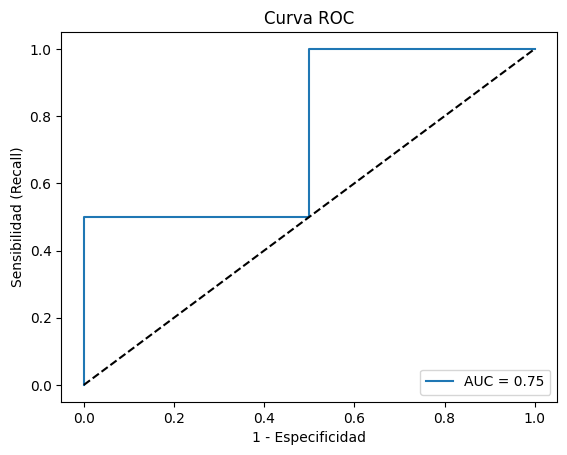

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Ejemplo con datos ficticios
y_true = [0, 0, 1, 1]
y_scores = [0.1, 0.4, 0.35, 0.8]

fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # línea diagonal
plt.xlabel("1 - Especificidad")
plt.ylabel("Sensibilidad (Recall)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

> La curva ROC no depende de un único punto de corte, sino que muestra cómo se comporta el modelo para todos los posibles umbrales. Eso hace que el AUC sea una métrica global, y no dependa de elegir un valor arbitrario para clasificar.

### No todas las métricas importan igual: depende del contexto

Aquí está la clave, **no buscamos optimizar siempre la misma métrica**. El contexto define qué error es más costoso:  

- **En salud (COVID, cáncer, VIH):** Priorizar **sensibilidad**. Es mejor detectar a todos los enfermos (aunque haya falsos positivos) que dejar sin diagnóstico a alguien enfermo.  

- **En justicia (culpable/inocente):** Priorizar **especificidad**. Es preferible que algunos culpables no sean detectados antes de condenar a un inocente.  

- **En crédito financiero:** Buscar **equilibrio**.  
  - Falso negativo: prestar dinero a alguien que no pagará → pérdida económica.  
  - Falso positivo: rechazar a un cliente que sí pagaría → pérdida de oportunidad. Aquí se usan métricas como **F1 o AUC**, o incluso funciones de costo personalizadas.

## Métricas para modelos de regresión

Un **modelo de regresión** se utiliza para predecir un valor continuo. Ejemplos típicos incluyen:  

- Estimar el precio de una casa a partir de su tamaño, número de habitaciones y ubicación.  
- Predecir la demanda eléctrica de una ciudad en función de la hora y la temperatura.  
- Estimar las ventas de un producto para la próxima semana.  

En estos casos, la variable de salida es **numérica y continua**, y necesitamos formas de medir **qué tan cerca están las predicciones de los valores reales**.

### Error absoluto medio (MAE)

El MAE mide cuánto se equivoca un modelo en promedio cuando hace predicciones. En lugar de fijarse solo en si una predicción fue correcta o no, calcula qué tan lejos estuvo de la respuesta real.

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

Mide el promedio de las diferencias absolutas entre los valores reales y las predicciones.  

Ejemplo:  
- Valores reales: [100, 200, 300]  
- Predicciones: [110, 190, 295]  

Para cada dato, calculamos el error absoluto:

- Para el primero: (100 – 110) = 10
- Para el segundo: (200 – 190) = 10
- Para el tercero: (300 – 295) = 5

**Errores absolutos = [10, 10, 5]**

**MAE = (10 + 10 + 5)/3 = 8.3**  

Ese **8.3** significa que, en promedio, el modelo se equivoca 8.3 unidades respecto al valor real. Si estamos prediciendo precios de casas en dólares, se equivoca en 8.3 dólares. Si fueran temperaturas en °C, se equivoca en 8.3 °C. Por eso decimos que el MAE se mide en las mismas unidades de la variable objetivo. 


### Error cuadrático medio (MSE)

El **MSE** también mide cuánto se equivoca un modelo en promedio, igual que el MAE. La diferencia es que, en lugar de tomar los errores absolutos, los eleva al cuadrado antes de promediarlos. Eso significa:

- Errores pequeños se hacen aún más pequeños (porque 2² = 4).
- Errores grandes se vuelven mucho más grandes (porque 20² = 400).

En otras palabras, el MSE castiga mucho más los errores grandes que los pequeños.

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

En el ejemplo:  

- Valores reales: [100, 200, 300]
- Predicciones: [110, 190, 295] 

**Errores absolutos (como en MAE): [10, 10, 5]**. Ahora elevamos al cuadrado cada error:

- 10² = 100
- 10² = 100
- 5² = 25

**MSE = (100 + 100 + 25)/3 = 75** 

Ese 75 representa el promedio de los errores al cuadrado. **Importante:** como los errores se elevaron al cuadrado, el resultado ya no está en las mismas unidades que la variable original. Si el valor eran dólares, ahora son dólares² (poco intuitivo). Si eran grados °C, ahora son °C². Por eso muchas veces se usa el RMSE (la raíz del MSE), para “volver” a las unidades originales.


### Raíz del error cuadrático medio (RMSE)

$$
RMSE = \sqrt{MSE}
$$

Es simplemente la raíz cuadrada del MSE.  En el ejemplo:  

RMSE = √75 ≈ **8.66**  
 
- Se expresa en las mismas unidades que la variable (dólares, metros, etc.).  
- Más fácil de interpretar que el MSE, pero conserva la sensibilidad a errores grandes.  

### Coeficiente de determinación ($R^2$)

Mide qué proporción de la variabilidad de los datos es explicada por el modelo.  

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$


Ejemplo:  
- Si $R^2 = 0.90$, significa que el modelo explica el 90% de la variación de la variable objetivo.  
- Si $R^2 = 0$, el modelo no explica nada mejor que usar siempre la media.  
- Si $R^2 < 0$, el modelo es peor que la media (mal ajuste).  

Es útil como medida global de ajuste. No siempre es suficiente, un modelo puede tener buen $R^2$ pero errores grandes en ciertos casos individuales.  


### ¿Cuál métrica usar?

- **MAE**: cuando quieres interpretar el error en **unidades reales** (ej. dólares, km, °C).  
- **MSE**: cuando quieres penalizar mucho los errores grandes.  
- **RMSE**: cuando quieres algo intermedio, expresado en unidades reales pero sensible a errores grandes.  
- **$R^2$**: cuando quieres un indicador **global de ajuste**, fácil de comunicar a públicos no técnicos.  

En `scikit-learn`, todas estas métricas se pueden calcular fácilmente y la documentación está accesible [aquí](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)  